[Dataset-link]("https://www.kaggle.com/datasets/tongpython/cat-and-dog")


In [1]:
import tensorflow as tf
print(tf.__version__)

2.10.0


In [2]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from glob import glob
import os

In [3]:
train_dir = os.path.join( 'dog cat/training_set/')
test_dir = os.path.join('dog cat/test_set/')

In [4]:
# useful for getting number of output classes
folders = glob('dog cat/training_set/*')

In [5]:
folders

['dog cat/training_set\\cats', 'dog cat/training_set\\dogs']

In [6]:
folders = glob('dog cat/test_set/*')

In [7]:
folders

['dog cat/test_set\\cats', 'dog cat/test_set\\dogs']

## Preparing data

In [8]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale = 1./255)

In [9]:

training_set = train_datagen.flow_from_directory(train_dir,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(test_dir,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


## creating the model


In [10]:
IMAGE_SIZE=[224, 224]

In [11]:
vgg16 = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
# for this project i am using vgg16 model

In [12]:
# here instead of Freezing al the ayers , we are making some layers trainable

vgg16.trainable = True

set_trainable = False

for layer in vgg16.layers:
  if layer.name == 'block5_conv1':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

for layer in vgg16.layers:
  print(layer.name,layer.trainable)

# its is recommended to make the last block as True  because the last layers will learn complex feautres

input_1 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 True
block5_conv2 True
block5_conv3 True
block5_pool True


In [13]:
model = Sequential()

model.add(vgg16)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(2,activation='softmax'))

In [14]:
model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.optimizers.SGD(lr=0.001),
    metrics=['accuracy']    
)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 256)               6422784   
                                                                 
 dense_1 (Dense)             (None, 2)                 514       
                                                                 
Total params: 21,137,986
Trainable params: 13,502,722
Non-trainable params: 7,635,264
_________________________________________________________________


C:\Users\HP\Anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [15]:
# fit the model
epochs = 25
history = model.fit(training_set, validation_data=test_set,epochs=epochs,
            steps_per_epoch=len(training_set),
            validation_steps=len(test_set), 
            verbose=1,)

Epoch 1/25
251/251 [==============================] - 436s 2s/step - loss: 0.5530 - accuracy: 0.7168 - val_loss: 0.3209 - val_accuracy: 0.8586
Epoch 2/25
251/251 [==============================] - 133s 529ms/step - loss: 0.3443 - accuracy: 0.8462 - val_loss: 0.2079 - val_accuracy: 0.9105
Epoch 3/25
251/251 [==============================] - 135s 538ms/step - loss: 0.2764 - accuracy: 0.8780 - val_loss: 0.1730 - val_accuracy: 0.9268
Epoch 4/25
251/251 [==============================] - 136s 540ms/step - loss: 0.2395 - accuracy: 0.8999 - val_loss: 0.1520 - val_accuracy: 0.9338
Epoch 5/25
251/251 [==============================] - 136s 542ms/step - loss: 0.2111 - accuracy: 0.9136 - val_loss: 0.1455 - val_accuracy: 0.9441
Epoch 6/25
251/251 [==============================] - 138s 550ms/step - loss: 0.1977 - accuracy: 0.9172 - val_loss: 0.1774 - val_accuracy: 0.9283
Epoch 7/25
251/251 [==============================] - 137s 545ms/step - loss: 0.1806 - accuracy: 0.9249 - val_loss: 0.1276 - va

In [17]:
scores = model.evaluate(test_set)

64/64 [==============================] - 18s 276ms/step - loss: 0.1107 - accuracy: 0.9619


In [18]:
print("test loss",scores[0])
print("test accuracy",scores[1])

test loss 0.11071612685918808
test accuracy 0.9619377255439758


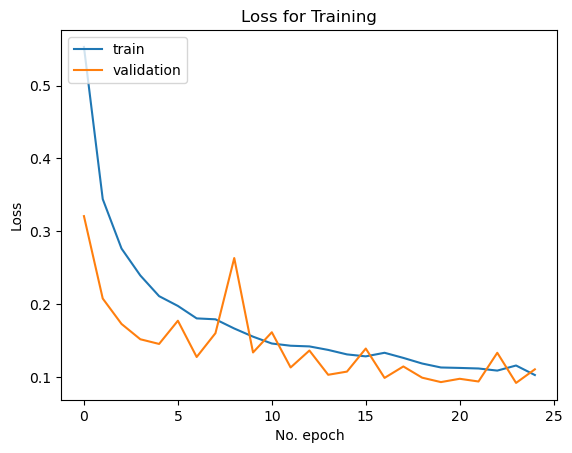

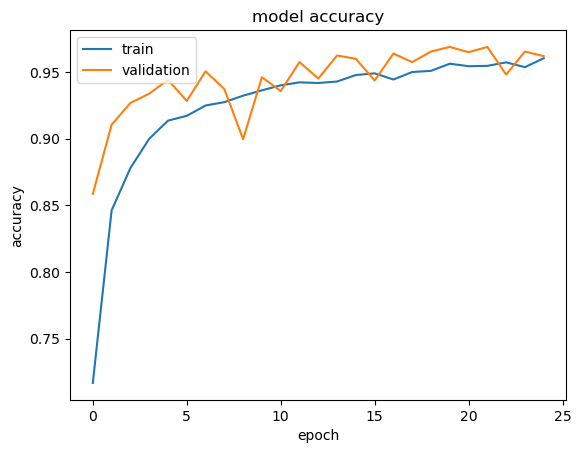

In [19]:
plt.plot(history.history['loss'], label='Loss (training data)')
plt.plot(history.history['val_loss'], label='Loss (validation data)')
plt.title('Loss for Training')
plt.ylabel('Loss')
plt.xlabel('No. epoch')
plt.legend(['train', 'validation'], loc="upper left")
plt.show()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [56]:
import numpy as np
from tensorflow.keras.preprocessing import image
for root, subdirectories, files in os.walk("dog cat/test_set/"):
    count=0
    for file in files:
        file_full_path = os.path.join(root, file)
        test_image=image.load_img(file_full_path,target_size=(224,224))
        test_image=image.img_to_array(test_image)
        test_image=test_image/255
        test_image=np.expand_dims(test_image,axis=0)
        result=model.predict(test_image)
        print(file_full_path,"---->"," ",result,"-->", np.argmax(result) )
        count=count+1
        print("\n")
print(count)

1/1 [==============================] - 0s 26ms/step
dog cat/test_set/cats\cat.4001.jpg ---->   [[0.97847855 0.02152147]] --> 0


1/1 [==============================] - 0s 32ms/step
dog cat/test_set/cats\cat.4002.jpg ---->   [[0.81081235 0.1891876 ]] --> 0


1/1 [==============================] - 0s 29ms/step
dog cat/test_set/cats\cat.4003.jpg ---->   [[9.9999154e-01 8.5000966e-06]] --> 0


1/1 [==============================] - 0s 19ms/step
dog cat/test_set/cats\cat.4004.jpg ---->   [[0.9982497  0.00175022]] --> 0


1/1 [==============================] - 0s 30ms/step
dog cat/test_set/cats\cat.4005.jpg ---->   [[0.99034286 0.00965719]] --> 0


1/1 [==============================] - 0s 17ms/step
dog cat/test_set/cats\cat.4006.jpg ---->   [[0.99748576 0.0025142 ]] --> 0


1/1 [==============================] - 0s 21ms/step
dog cat/test_set/cats\cat.4007.jpg ---->   [[9.9978787e-01 2.1212692e-04]] --> 0


1/1 [==============================] - 0s 12ms/step
dog cat/test_set/cats\cat.4008.jp

1/1 [==============================] - 0s 21ms/step
dog cat/test_set/cats\cat.4064.jpg ---->   [[0.99853754 0.00146243]] --> 0


1/1 [==============================] - 0s 23ms/step
dog cat/test_set/cats\cat.4065.jpg ---->   [[9.9999726e-01 2.6912185e-06]] --> 0


1/1 [==============================] - 0s 16ms/step
dog cat/test_set/cats\cat.4066.jpg ---->   [[0.9964779  0.00352205]] --> 0


1/1 [==============================] - 0s 12ms/step
dog cat/test_set/cats\cat.4067.jpg ---->   [[1.0000000e+00 1.3163866e-08]] --> 0


1/1 [==============================] - 0s 21ms/step
dog cat/test_set/cats\cat.4068.jpg ---->   [[9.999076e-01 9.233498e-05]] --> 0


1/1 [==============================] - 0s 11ms/step
dog cat/test_set/cats\cat.4069.jpg ---->   [[0.9968054  0.00319453]] --> 0


1/1 [==============================] - 0s 22ms/step
dog cat/test_set/cats\cat.4070.jpg ---->   [[9.9998939e-01 1.0655419e-05]] --> 0


1/1 [==============================] - 0s 11ms/step
dog cat/test_set/cats\c

1/1 [==============================] - 0s 22ms/step
dog cat/test_set/cats\cat.4126.jpg ---->   [[0.9500695  0.04993048]] --> 0


1/1 [==============================] - 0s 23ms/step
dog cat/test_set/cats\cat.4127.jpg ---->   [[0.9953719  0.00462814]] --> 0


1/1 [==============================] - 0s 14ms/step
dog cat/test_set/cats\cat.4128.jpg ---->   [[9.999901e-01 9.953370e-06]] --> 0


1/1 [==============================] - 0s 23ms/step
dog cat/test_set/cats\cat.4129.jpg ---->   [[0.9887101  0.01128989]] --> 0


1/1 [==============================] - 0s 26ms/step
dog cat/test_set/cats\cat.4130.jpg ---->   [[9.9999881e-01 1.1930342e-06]] --> 0


1/1 [==============================] - 0s 21ms/step
dog cat/test_set/cats\cat.4131.jpg ---->   [[9.9982733e-01 1.7267096e-04]] --> 0


1/1 [==============================] - 0s 25ms/step
dog cat/test_set/cats\cat.4132.jpg ---->   [[0.99852824 0.00147173]] --> 0


1/1 [==============================] - 0s 12ms/step
dog cat/test_set/cats\cat.413

1/1 [==============================] - 0s 20ms/step
dog cat/test_set/cats\cat.4185.jpg ---->   [[0.9893181  0.01068191]] --> 0


1/1 [==============================] - 0s 25ms/step
dog cat/test_set/cats\cat.4186.jpg ---->   [[9.999994e-01 6.019232e-07]] --> 0


1/1 [==============================] - 0s 18ms/step
dog cat/test_set/cats\cat.4187.jpg ---->   [[9.9999762e-01 2.3726404e-06]] --> 0


1/1 [==============================] - 0s 24ms/step
dog cat/test_set/cats\cat.4188.jpg ---->   [[9.999528e-01 4.717500e-05]] --> 0


1/1 [==============================] - 0s 13ms/step
dog cat/test_set/cats\cat.4189.jpg ---->   [[9.999676e-01 3.241055e-05]] --> 0


1/1 [==============================] - 0s 18ms/step
dog cat/test_set/cats\cat.4190.jpg ---->   [[0.01499757 0.98500246]] --> 1


1/1 [==============================] - 0s 20ms/step
dog cat/test_set/cats\cat.4191.jpg ---->   [[0.9966432  0.00335679]] --> 0


1/1 [==============================] - 0s 25ms/step
dog cat/test_set/cats\cat.4

1/1 [==============================] - 0s 20ms/step
dog cat/test_set/cats\cat.4245.jpg ---->   [[0.9985545  0.00144545]] --> 0


1/1 [==============================] - 0s 23ms/step
dog cat/test_set/cats\cat.4246.jpg ---->   [[9.999962e-01 3.860249e-06]] --> 0


1/1 [==============================] - 0s 19ms/step
dog cat/test_set/cats\cat.4247.jpg ---->   [[9.9998891e-01 1.1040902e-05]] --> 0


1/1 [==============================] - 0s 25ms/step
dog cat/test_set/cats\cat.4248.jpg ---->   [[9.99895692e-01 1.04293256e-04]] --> 0


1/1 [==============================] - 0s 21ms/step
dog cat/test_set/cats\cat.4249.jpg ---->   [[0.96080524 0.03919474]] --> 0


1/1 [==============================] - 0s 16ms/step
dog cat/test_set/cats\cat.4250.jpg ---->   [[0.9988617  0.00113835]] --> 0


1/1 [==============================] - 0s 18ms/step
dog cat/test_set/cats\cat.4251.jpg ---->   [[9.99999881e-01 1.03303336e-07]] --> 0


1/1 [==============================] - 0s 29ms/step
dog cat/test_set/ca

1/1 [==============================] - 0s 18ms/step
dog cat/test_set/cats\cat.4307.jpg ---->   [[1.000000e+00 4.542862e-08]] --> 0


1/1 [==============================] - 0s 16ms/step
dog cat/test_set/cats\cat.4308.jpg ---->   [[0.4409883 0.5590117]] --> 1


1/1 [==============================] - 0s 16ms/step
dog cat/test_set/cats\cat.4309.jpg ---->   [[0.9790294  0.02097056]] --> 0


1/1 [==============================] - 0s 17ms/step
dog cat/test_set/cats\cat.4310.jpg ---->   [[0.9970264  0.00297364]] --> 0


1/1 [==============================] - 0s 16ms/step
dog cat/test_set/cats\cat.4311.jpg ---->   [[0.9941988  0.00580121]] --> 0


1/1 [==============================] - 0s 20ms/step
dog cat/test_set/cats\cat.4312.jpg ---->   [[0.97600424 0.02399577]] --> 0


1/1 [==============================] - 0s 34ms/step
dog cat/test_set/cats\cat.4313.jpg ---->   [[9.9998808e-01 1.1909487e-05]] --> 0


1/1 [==============================] - 0s 15ms/step
dog cat/test_set/cats\cat.4314.jpg --

1/1 [==============================] - 0s 25ms/step
dog cat/test_set/cats\cat.4369.jpg ---->   [[9.9998677e-01 1.3203406e-05]] --> 0


1/1 [==============================] - 0s 22ms/step
dog cat/test_set/cats\cat.4370.jpg ---->   [[0.9302841  0.06971586]] --> 0


1/1 [==============================] - 0s 25ms/step
dog cat/test_set/cats\cat.4371.jpg ---->   [[9.9999833e-01 1.6986274e-06]] --> 0


1/1 [==============================] - 0s 20ms/step
dog cat/test_set/cats\cat.4372.jpg ---->   [[9.9999893e-01 1.1082456e-06]] --> 0


1/1 [==============================] - 0s 25ms/step
dog cat/test_set/cats\cat.4373.jpg ---->   [[0.99852175 0.0014783 ]] --> 0


1/1 [==============================] - 0s 25ms/step
dog cat/test_set/cats\cat.4374.jpg ---->   [[0.9958158  0.00418413]] --> 0


1/1 [==============================] - 0s 17ms/step
dog cat/test_set/cats\cat.4375.jpg ---->   [[9.999279e-01 7.213469e-05]] --> 0


1/1 [==============================] - 0s 23ms/step
dog cat/test_set/cats\c

1/1 [==============================] - 0s 18ms/step
dog cat/test_set/cats\cat.4430.jpg ---->   [[0.9950582  0.00494187]] --> 0


1/1 [==============================] - 0s 23ms/step
dog cat/test_set/cats\cat.4431.jpg ---->   [[9.9999332e-01 6.6608154e-06]] --> 0


1/1 [==============================] - 0s 20ms/step
dog cat/test_set/cats\cat.4432.jpg ---->   [[0.9494834  0.05051663]] --> 0


1/1 [==============================] - 0s 26ms/step
dog cat/test_set/cats\cat.4433.jpg ---->   [[0.9863669  0.01363306]] --> 0


1/1 [==============================] - 0s 22ms/step
dog cat/test_set/cats\cat.4434.jpg ---->   [[9.9999702e-01 3.0363335e-06]] --> 0


1/1 [==============================] - 0s 34ms/step
dog cat/test_set/cats\cat.4435.jpg ---->   [[9.9996519e-01 3.4853565e-05]] --> 0


1/1 [==============================] - 0s 17ms/step
dog cat/test_set/cats\cat.4436.jpg ---->   [[9.9972349e-01 2.7653202e-04]] --> 0


1/1 [==============================] - 0s 24ms/step
dog cat/test_set/cats

1/1 [==============================] - 0s 24ms/step
dog cat/test_set/cats\cat.4492.jpg ---->   [[0.99807274 0.00192724]] --> 0


1/1 [==============================] - 0s 23ms/step
dog cat/test_set/cats\cat.4493.jpg ---->   [[0.586785   0.41321495]] --> 0


1/1 [==============================] - 0s 19ms/step
dog cat/test_set/cats\cat.4494.jpg ---->   [[0.990244  0.0097561]] --> 0


1/1 [==============================] - 0s 16ms/step
dog cat/test_set/cats\cat.4495.jpg ---->   [[9.9990594e-01 9.4000658e-05]] --> 0


1/1 [==============================] - 0s 25ms/step
dog cat/test_set/cats\cat.4496.jpg ---->   [[0.97791404 0.02208603]] --> 0


1/1 [==============================] - 0s 17ms/step
dog cat/test_set/cats\cat.4497.jpg ---->   [[0.8714975  0.12850246]] --> 0


1/1 [==============================] - 0s 24ms/step
dog cat/test_set/cats\cat.4498.jpg ---->   [[0.8844123  0.11558773]] --> 0


1/1 [==============================] - 0s 15ms/step
dog cat/test_set/cats\cat.4499.jpg ----> 

1/1 [==============================] - 0s 16ms/step
dog cat/test_set/cats\cat.4554.jpg ---->   [[0.3909541  0.60904586]] --> 1


1/1 [==============================] - 0s 35ms/step
dog cat/test_set/cats\cat.4555.jpg ---->   [[9.9994683e-01 5.3129868e-05]] --> 0


1/1 [==============================] - 0s 16ms/step
dog cat/test_set/cats\cat.4556.jpg ---->   [[9.9999893e-01 1.0737336e-06]] --> 0


1/1 [==============================] - 0s 26ms/step
dog cat/test_set/cats\cat.4557.jpg ---->   [[0.9851276  0.01487234]] --> 0


1/1 [==============================] - 0s 14ms/step
dog cat/test_set/cats\cat.4558.jpg ---->   [[9.999924e-01 7.578802e-06]] --> 0


1/1 [==============================] - 0s 22ms/step
dog cat/test_set/cats\cat.4559.jpg ---->   [[9.9951828e-01 4.8167724e-04]] --> 0


1/1 [==============================] - 0s 24ms/step
dog cat/test_set/cats\cat.4560.jpg ---->   [[9.999999e-01 9.781328e-08]] --> 0


1/1 [==============================] - 0s 21ms/step
dog cat/test_set/ca

1/1 [==============================] - 0s 15ms/step
dog cat/test_set/cats\cat.4616.jpg ---->   [[0.27805725 0.7219427 ]] --> 1


1/1 [==============================] - 0s 19ms/step
dog cat/test_set/cats\cat.4617.jpg ---->   [[9.999478e-01 5.222158e-05]] --> 0


1/1 [==============================] - 0s 23ms/step
dog cat/test_set/cats\cat.4618(1).jpg ---->   [[9.999757e-01 2.434032e-05]] --> 0


1/1 [==============================] - 0s 22ms/step
dog cat/test_set/cats\cat.4618.jpg ---->   [[9.999757e-01 2.434032e-05]] --> 0


1/1 [==============================] - 0s 21ms/step
dog cat/test_set/cats\cat.4619.jpg ---->   [[9.9998891e-01 1.1077816e-05]] --> 0


1/1 [==============================] - 0s 20ms/step
dog cat/test_set/cats\cat.4620.jpg ---->   [[0.9986915  0.00130847]] --> 0


1/1 [==============================] - 0s 25ms/step
dog cat/test_set/cats\cat.4621.jpg ---->   [[0.9986084 0.0013916]] --> 0


1/1 [==============================] - 0s 15ms/step
dog cat/test_set/cats\cat.

1/1 [==============================] - 0s 28ms/step
dog cat/test_set/cats\cat.4676.jpg ---->   [[0.99614125 0.00385876]] --> 0


1/1 [==============================] - 0s 23ms/step
dog cat/test_set/cats\cat.4677.jpg ---->   [[9.9999797e-01 1.9961321e-06]] --> 0


1/1 [==============================] - 0s 22ms/step
dog cat/test_set/cats\cat.4678.jpg ---->   [[9.9977201e-01 2.2798307e-04]] --> 0


1/1 [==============================] - 0s 25ms/step
dog cat/test_set/cats\cat.4679.jpg ---->   [[9.9999869e-01 1.2565529e-06]] --> 0


1/1 [==============================] - 0s 16ms/step
dog cat/test_set/cats\cat.4680.jpg ---->   [[0.9582231  0.04177692]] --> 0


1/1 [==============================] - 0s 24ms/step
dog cat/test_set/cats\cat.4681.jpg ---->   [[9.9994385e-01 5.6190485e-05]] --> 0


1/1 [==============================] - 0s 24ms/step
dog cat/test_set/cats\cat.4682.jpg ---->   [[9.9995935e-01 4.0670257e-05]] --> 0


1/1 [==============================] - 0s 23ms/step
dog cat/test_se

1/1 [==============================] - 0s 21ms/step
dog cat/test_set/cats\cat.4738.jpg ---->   [[0.9986908  0.00130924]] --> 0


1/1 [==============================] - 0s 24ms/step
dog cat/test_set/cats\cat.4739.jpg ---->   [[0.9863121  0.01368795]] --> 0


1/1 [==============================] - 0s 13ms/step
dog cat/test_set/cats\cat.4740.jpg ---->   [[9.9999952e-01 5.0502126e-07]] --> 0


1/1 [==============================] - 0s 21ms/step
dog cat/test_set/cats\cat.4741.jpg ---->   [[0.24765985 0.7523402 ]] --> 1


1/1 [==============================] - 0s 25ms/step
dog cat/test_set/cats\cat.4742.jpg ---->   [[0.94900614 0.05099387]] --> 0


1/1 [==============================] - 0s 23ms/step
dog cat/test_set/cats\cat.4743.jpg ---->   [[9.9967182e-01 3.2822514e-04]] --> 0


1/1 [==============================] - 0s 20ms/step
dog cat/test_set/cats\cat.4744.jpg ---->   [[0.99808466 0.0019153 ]] --> 0


1/1 [==============================] - 0s 21ms/step
dog cat/test_set/cats\cat.4745.jp

1/1 [==============================] - 0s 23ms/step
dog cat/test_set/cats\cat.4800.jpg ---->   [[0.9536325  0.04636754]] --> 0


1/1 [==============================] - 0s 26ms/step
dog cat/test_set/cats\cat.4801.jpg ---->   [[9.993831e-01 6.169399e-04]] --> 0


1/1 [==============================] - 0s 23ms/step
dog cat/test_set/cats\cat.4802.jpg ---->   [[0.85585064 0.14414932]] --> 0


1/1 [==============================] - 0s 18ms/step
dog cat/test_set/cats\cat.4803(1).jpg ---->   [[9.999993e-01 6.792918e-07]] --> 0


1/1 [==============================] - 0s 25ms/step
dog cat/test_set/cats\cat.4803.jpg ---->   [[9.999993e-01 6.792918e-07]] --> 0


1/1 [==============================] - 0s 19ms/step
dog cat/test_set/cats\cat.4804.jpg ---->   [[9.9983358e-01 1.6638491e-04]] --> 0


1/1 [==============================] - 0s 26ms/step
dog cat/test_set/cats\cat.4805.jpg ---->   [[0.61379063 0.3862093 ]] --> 0


1/1 [==============================] - 0s 18ms/step
dog cat/test_set/cats\ca

1/1 [==============================] - 0s 8ms/step
dog cat/test_set/cats\cat.4860.jpg ---->   [[9.9999917e-01 8.4132500e-07]] --> 0


1/1 [==============================] - 0s 13ms/step
dog cat/test_set/cats\cat.4861.jpg ---->   [[0.9521289  0.04787105]] --> 0


1/1 [==============================] - 0s 25ms/step
dog cat/test_set/cats\cat.4862.jpg ---->   [[9.9999809e-01 1.9242827e-06]] --> 0


1/1 [==============================] - 0s 22ms/step
dog cat/test_set/cats\cat.4863.jpg ---->   [[0.94872504 0.05127495]] --> 0


1/1 [==============================] - 0s 17ms/step
dog cat/test_set/cats\cat.4864.jpg ---->   [[0.9848875  0.01511244]] --> 0


1/1 [==============================] - 0s 25ms/step
dog cat/test_set/cats\cat.4865.jpg ---->   [[9.9965179e-01 3.4821994e-04]] --> 0


1/1 [==============================] - 0s 17ms/step
dog cat/test_set/cats\cat.4866.jpg ---->   [[0.9988054  0.00119465]] --> 0


1/1 [==============================] - 0s 24ms/step
dog cat/test_set/cats\cat.48

1/1 [==============================] - 0s 20ms/step
dog cat/test_set/cats\cat.4922.jpg ---->   [[9.9999666e-01 3.3271065e-06]] --> 0


1/1 [==============================] - 0s 17ms/step
dog cat/test_set/cats\cat.4923.jpg ---->   [[9.9991333e-01 8.6709253e-05]] --> 0


1/1 [==============================] - 0s 28ms/step
dog cat/test_set/cats\cat.4924.jpg ---->   [[9.999448e-01 5.524621e-05]] --> 0


1/1 [==============================] - 0s 24ms/step
dog cat/test_set/cats\cat.4925.jpg ---->   [[9.9997747e-01 2.2519314e-05]] --> 0


1/1 [==============================] - 0s 25ms/step
dog cat/test_set/cats\cat.4926.jpg ---->   [[9.9943680e-01 5.6322216e-04]] --> 0


1/1 [==============================] - 0s 21ms/step
dog cat/test_set/cats\cat.4927.jpg ---->   [[9.9990356e-01 9.6469041e-05]] --> 0


1/1 [==============================] - 0s 25ms/step
dog cat/test_set/cats\cat.4928.jpg ---->   [[0.9700742 0.0299258]] --> 0


1/1 [==============================] - 0s 23ms/step
dog cat/test_

1/1 [==============================] - 0s 21ms/step
dog cat/test_set/cats\cat.4984.jpg ---->   [[0.9876215  0.01237856]] --> 0


1/1 [==============================] - 0s 16ms/step
dog cat/test_set/cats\cat.4985.jpg ---->   [[0.00615315 0.99384683]] --> 1


1/1 [==============================] - 0s 15ms/step
dog cat/test_set/cats\cat.4986.jpg ---->   [[0.6833501  0.31664994]] --> 0


1/1 [==============================] - 0s 25ms/step
dog cat/test_set/cats\cat.4987.jpg ---->   [[9.999926e-01 7.422271e-06]] --> 0


1/1 [==============================] - 0s 33ms/step
dog cat/test_set/cats\cat.4988.jpg ---->   [[0.99882716 0.00117283]] --> 0


1/1 [==============================] - 0s 26ms/step
dog cat/test_set/cats\cat.4989.jpg ---->   [[0.99649245 0.00350753]] --> 0


1/1 [==============================] - 0s 18ms/step
dog cat/test_set/cats\cat.4990.jpg ---->   [[9.9995506e-01 4.4980123e-05]] --> 0


1/1 [==============================] - 0s 16ms/step
dog cat/test_set/cats\cat.4991.jpg 

1/1 [==============================] - 0s 23ms/step
dog cat/test_set/dogs\dog.4046.jpg ---->   [[3.3998717e-07 9.9999964e-01]] --> 1


1/1 [==============================] - 0s 24ms/step
dog cat/test_set/dogs\dog.4047.jpg ---->   [[9.362911e-06 9.999906e-01]] --> 1


1/1 [==============================] - 0s 25ms/step
dog cat/test_set/dogs\dog.4048.jpg ---->   [[0.00781637 0.9921836 ]] --> 1


1/1 [==============================] - 0s 26ms/step
dog cat/test_set/dogs\dog.4049.jpg ---->   [[2.644143e-08 1.000000e+00]] --> 1


1/1 [==============================] - 0s 34ms/step
dog cat/test_set/dogs\dog.4050.jpg ---->   [[3.4732598e-06 9.9999654e-01]] --> 1


1/1 [==============================] - 0s 26ms/step
dog cat/test_set/dogs\dog.4051.jpg ---->   [[4.3847595e-10 1.0000000e+00]] --> 1


1/1 [==============================] - 0s 15ms/step
dog cat/test_set/dogs\dog.4052.jpg ---->   [[3.6776310e-05 9.9996316e-01]] --> 1


1/1 [==============================] - 0s 26ms/step
dog cat/test_

1/1 [==============================] - 0s 23ms/step
dog cat/test_set/dogs\dog.4108.jpg ---->   [[1.7540622e-06 9.9999821e-01]] --> 1


1/1 [==============================] - 0s 23ms/step
dog cat/test_set/dogs\dog.4109.jpg ---->   [[0.06779478 0.9322052 ]] --> 1


1/1 [==============================] - 0s 24ms/step
dog cat/test_set/dogs\dog.4110.jpg ---->   [[0.0048021  0.99519795]] --> 1


1/1 [==============================] - 0s 27ms/step
dog cat/test_set/dogs\dog.4111.jpg ---->   [[3.3119435e-10 1.0000000e+00]] --> 1


1/1 [==============================] - 0s 15ms/step
dog cat/test_set/dogs\dog.4112.jpg ---->   [[2.5698187e-06 9.9999738e-01]] --> 1


1/1 [==============================] - 0s 23ms/step
dog cat/test_set/dogs\dog.4113.jpg ---->   [[0.01416742 0.9858326 ]] --> 1


1/1 [==============================] - 0s 18ms/step
dog cat/test_set/dogs\dog.4114.jpg ---->   [[1.4204786e-08 1.0000000e+00]] --> 1


1/1 [==============================] - 0s 25ms/step
dog cat/test_set/dogs

1/1 [==============================] - 0s 26ms/step
dog cat/test_set/dogs\dog.4168.jpg ---->   [[1.1709843e-05 9.9998832e-01]] --> 1


1/1 [==============================] - 0s 26ms/step
dog cat/test_set/dogs\dog.4169.jpg ---->   [[3.0466847e-04 9.9969530e-01]] --> 1


1/1 [==============================] - 0s 12ms/step
dog cat/test_set/dogs\dog.4170.jpg ---->   [[4.597304e-09 1.000000e+00]] --> 1


1/1 [==============================] - 0s 25ms/step
dog cat/test_set/dogs\dog.4171(1).jpg ---->   [[0.8758306  0.12416947]] --> 0


1/1 [==============================] - 0s 26ms/step
dog cat/test_set/dogs\dog.4171.jpg ---->   [[0.8758306  0.12416947]] --> 0


1/1 [==============================] - 0s 15ms/step
dog cat/test_set/dogs\dog.4172.jpg ---->   [[4.793368e-09 1.000000e+00]] --> 1


1/1 [==============================] - 0s 23ms/step
dog cat/test_set/dogs\dog.4173.jpg ---->   [[7.467998e-09 1.000000e+00]] --> 1


1/1 [==============================] - 0s 23ms/step
dog cat/test_set/d

1/1 [==============================] - 0s 24ms/step
dog cat/test_set/dogs\dog.4228.jpg ---->   [[0.00738342 0.9926166 ]] --> 1


1/1 [==============================] - 0s 25ms/step
dog cat/test_set/dogs\dog.4229.jpg ---->   [[2.8324124e-10 1.0000000e+00]] --> 1


1/1 [==============================] - 0s 25ms/step
dog cat/test_set/dogs\dog.4230.jpg ---->   [[8.599117e-14 1.000000e+00]] --> 1


1/1 [==============================] - 0s 26ms/step
dog cat/test_set/dogs\dog.4231.jpg ---->   [[1.3234439e-11 1.0000000e+00]] --> 1


1/1 [==============================] - 0s 22ms/step
dog cat/test_set/dogs\dog.4232.jpg ---->   [[1.0578554e-08 1.0000000e+00]] --> 1


1/1 [==============================] - 0s 12ms/step
dog cat/test_set/dogs\dog.4233.jpg ---->   [[0.03868525 0.9613147 ]] --> 1


1/1 [==============================] - 0s 20ms/step
dog cat/test_set/dogs\dog.4234.jpg ---->   [[8.521253e-04 9.991479e-01]] --> 1


1/1 [==============================] - 0s 26ms/step
dog cat/test_set/do

1/1 [==============================] - 0s 24ms/step
dog cat/test_set/dogs\dog.4290.jpg ---->   [[0.00344438 0.9965557 ]] --> 1


1/1 [==============================] - 0s 13ms/step
dog cat/test_set/dogs\dog.4291.jpg ---->   [[3.988058e-08 1.000000e+00]] --> 1


1/1 [==============================] - 0s 23ms/step
dog cat/test_set/dogs\dog.4292.jpg ---->   [[7.2691466e-05 9.9992728e-01]] --> 1


1/1 [==============================] - 0s 22ms/step
dog cat/test_set/dogs\dog.4293.jpg ---->   [[7.0282286e-10 1.0000000e+00]] --> 1


1/1 [==============================] - 0s 17ms/step
dog cat/test_set/dogs\dog.4294.jpg ---->   [[1.908828e-05 9.999809e-01]] --> 1


1/1 [==============================] - 0s 15ms/step
dog cat/test_set/dogs\dog.4295.jpg ---->   [[0.01176125 0.9882387 ]] --> 1


1/1 [==============================] - 0s 18ms/step
dog cat/test_set/dogs\dog.4296.jpg ---->   [[8.383040e-05 9.999162e-01]] --> 1


1/1 [==============================] - 0s 25ms/step
dog cat/test_set/dogs

1/1 [==============================] - 0s 23ms/step
dog cat/test_set/dogs\dog.4352.jpg ---->   [[3.3381971e-07 9.9999964e-01]] --> 1


1/1 [==============================] - 0s 15ms/step
dog cat/test_set/dogs\dog.4353.jpg ---->   [[1.4427221e-06 9.9999857e-01]] --> 1


1/1 [==============================] - 0s 25ms/step
dog cat/test_set/dogs\dog.4354.jpg ---->   [[5.8017868e-06 9.9999416e-01]] --> 1


1/1 [==============================] - 0s 14ms/step
dog cat/test_set/dogs\dog.4355.jpg ---->   [[1.3238495e-06 9.9999869e-01]] --> 1


1/1 [==============================] - 0s 19ms/step
dog cat/test_set/dogs\dog.4356.jpg ---->   [[6.192142e-04 9.993807e-01]] --> 1


1/1 [==============================] - 0s 24ms/step
dog cat/test_set/dogs\dog.4357.jpg ---->   [[0.04507335 0.95492667]] --> 1


1/1 [==============================] - 0s 24ms/step
dog cat/test_set/dogs\dog.4358.jpg ---->   [[8.379715e-05 9.999162e-01]] --> 1


1/1 [==============================] - 0s 24ms/step
dog cat/test_

1/1 [==============================] - 0s 17ms/step
dog cat/test_set/dogs\dog.4413.jpg ---->   [[1.2013556e-04 9.9987984e-01]] --> 1


1/1 [==============================] - 0s 24ms/step
dog cat/test_set/dogs\dog.4414.jpg ---->   [[1.5502641e-04 9.9984491e-01]] --> 1


1/1 [==============================] - 0s 20ms/step
dog cat/test_set/dogs\dog.4415.jpg ---->   [[1.2464509e-06 9.9999881e-01]] --> 1


1/1 [==============================] - 0s 23ms/step
dog cat/test_set/dogs\dog.4416.jpg ---->   [[8.3886624e-07 9.9999917e-01]] --> 1


1/1 [==============================] - 0s 18ms/step
dog cat/test_set/dogs\dog.4417.jpg ---->   [[1.9684332e-04 9.9980313e-01]] --> 1


1/1 [==============================] - 0s 23ms/step
dog cat/test_set/dogs\dog.4418.jpg ---->   [[1.9523259e-06 9.9999809e-01]] --> 1


1/1 [==============================] - 0s 19ms/step
dog cat/test_set/dogs\dog.4419.jpg ---->   [[1.877383e-08 1.000000e+00]] --> 1


1/1 [==============================] - 0s 24ms/step
dog c

1/1 [==============================] - 0s 24ms/step
dog cat/test_set/dogs\dog.4473.jpg ---->   [[2.7410957e-08 1.0000000e+00]] --> 1


1/1 [==============================] - 0s 25ms/step
dog cat/test_set/dogs\dog.4474.jpg ---->   [[0.07408281 0.9259172 ]] --> 1


1/1 [==============================] - 0s 28ms/step
dog cat/test_set/dogs\dog.4475.jpg ---->   [[0.00250953 0.9974905 ]] --> 1


1/1 [==============================] - 0s 25ms/step
dog cat/test_set/dogs\dog.4476.jpg ---->   [[0.00366414 0.99633586]] --> 1


1/1 [==============================] - 0s 25ms/step
dog cat/test_set/dogs\dog.4477.jpg ---->   [[4.4050226e-09 1.0000000e+00]] --> 1


1/1 [==============================] - 0s 17ms/step
dog cat/test_set/dogs\dog.4478.jpg ---->   [[2.049332e-05 9.999795e-01]] --> 1


1/1 [==============================] - 0s 17ms/step
dog cat/test_set/dogs\dog.4479.jpg ---->   [[3.4163491e-04 9.9965835e-01]] --> 1


1/1 [==============================] - 0s 25ms/step
dog cat/test_set/dogs\d

dog cat/test_set/dogs\dog.4534.jpg ---->   [[0.00165347 0.99834657]] --> 1


1/1 [==============================] - 0s 32ms/step
dog cat/test_set/dogs\dog.4535.jpg ---->   [[1.9900655e-07 9.9999976e-01]] --> 1


1/1 [==============================] - 0s 19ms/step
dog cat/test_set/dogs\dog.4536.jpg ---->   [[8.733156e-09 1.000000e+00]] --> 1


1/1 [==============================] - 0s 29ms/step
dog cat/test_set/dogs\dog.4537.jpg ---->   [[1.1602905e-04 9.9988401e-01]] --> 1


1/1 [==============================] - 0s 28ms/step
dog cat/test_set/dogs\dog.4538.jpg ---->   [[2.3741297e-06 9.9999762e-01]] --> 1


1/1 [==============================] - 0s 28ms/step
dog cat/test_set/dogs\dog.4539.jpg ---->   [[1.1002625e-07 9.9999988e-01]] --> 1


1/1 [==============================] - 0s 24ms/step
dog cat/test_set/dogs\dog.4540.jpg ---->   [[2.6675543e-06 9.9999738e-01]] --> 1


1/1 [==============================] - 0s 21ms/step
dog cat/test_set/dogs\dog.4541.jpg ---->   [[2.2439264e-12 1.00

1/1 [==============================] - 0s 23ms/step
dog cat/test_set/dogs\dog.4595.jpg ---->   [[2.8564386e-06 9.9999714e-01]] --> 1


1/1 [==============================] - 0s 39ms/step
dog cat/test_set/dogs\dog.4596.jpg ---->   [[1.07689316e-10 1.00000000e+00]] --> 1


1/1 [==============================] - 0s 26ms/step
dog cat/test_set/dogs\dog.4597.jpg ---->   [[1.1221971e-10 1.0000000e+00]] --> 1


1/1 [==============================] - 0s 26ms/step
dog cat/test_set/dogs\dog.4598.jpg ---->   [[5.3195174e-05 9.9994683e-01]] --> 1


1/1 [==============================] - 0s 22ms/step
dog cat/test_set/dogs\dog.4599.jpg ---->   [[1.4091749e-07 9.9999988e-01]] --> 1


1/1 [==============================] - 0s 17ms/step
dog cat/test_set/dogs\dog.4600.jpg ---->   [[0.02632606 0.97367394]] --> 1


1/1 [==============================] - 0s 29ms/step
dog cat/test_set/dogs\dog.4601.jpg ---->   [[1.4181109e-05 9.9998581e-01]] --> 1


1/1 [==============================] - 0s 25ms/step
dog cat

1/1 [==============================] - 0s 18ms/step
dog cat/test_set/dogs\dog.4655.jpg ---->   [[1.5609304e-04 9.9984384e-01]] --> 1


1/1 [==============================] - 0s 16ms/step
dog cat/test_set/dogs\dog.4656.jpg ---->   [[2.1077001e-06 9.9999785e-01]] --> 1


1/1 [==============================] - 0s 21ms/step
dog cat/test_set/dogs\dog.4657.jpg ---->   [[0.00834291 0.99165714]] --> 1


1/1 [==============================] - 0s 28ms/step
dog cat/test_set/dogs\dog.4658.jpg ---->   [[3.568337e-09 1.000000e+00]] --> 1


1/1 [==============================] - 0s 24ms/step
dog cat/test_set/dogs\dog.4659.jpg ---->   [[3.9831595e-04 9.9960166e-01]] --> 1


1/1 [==============================] - 0s 23ms/step
dog cat/test_set/dogs\dog.4660.jpg ---->   [[9.8437238e-07 9.9999905e-01]] --> 1


1/1 [==============================] - 0s 31ms/step
dog cat/test_set/dogs\dog.4661.jpg ---->   [[1.2152858e-05 9.9998784e-01]] --> 1


1/1 [==============================] - 0s 25ms/step
dog cat/tes

1/1 [==============================] - 0s 30ms/step
dog cat/test_set/dogs\dog.4717.jpg ---->   [[2.6498266e-09 1.0000000e+00]] --> 1


1/1 [==============================] - 0s 26ms/step
dog cat/test_set/dogs\dog.4718.jpg ---->   [[1.8278773e-05 9.9998176e-01]] --> 1


1/1 [==============================] - 0s 25ms/step
dog cat/test_set/dogs\dog.4719.jpg ---->   [[5.845217e-10 1.000000e+00]] --> 1


1/1 [==============================] - 0s 25ms/step
dog cat/test_set/dogs\dog.4720.jpg ---->   [[4.5707593e-09 1.0000000e+00]] --> 1


1/1 [==============================] - 0s 26ms/step
dog cat/test_set/dogs\dog.4721.jpg ---->   [[1.3191413e-08 1.0000000e+00]] --> 1


1/1 [==============================] - 0s 17ms/step
dog cat/test_set/dogs\dog.4722.jpg ---->   [[5.818854e-10 1.000000e+00]] --> 1


1/1 [==============================] - 0s 26ms/step
dog cat/test_set/dogs\dog.4723.jpg ---->   [[1.6952056e-10 1.0000000e+00]] --> 1


1/1 [==============================] - 0s 26ms/step
dog cat

dog cat/test_set/dogs\dog.4778.jpg ---->   [[1.0182994e-05 9.9998987e-01]] --> 1


1/1 [==============================] - 0s 26ms/step
dog cat/test_set/dogs\dog.4779.jpg ---->   [[1.7000381e-04 9.9983001e-01]] --> 1


1/1 [==============================] - 0s 26ms/step
dog cat/test_set/dogs\dog.4780.jpg ---->   [[3.2125299e-05 9.9996793e-01]] --> 1


1/1 [==============================] - 0s 22ms/step
dog cat/test_set/dogs\dog.4781.jpg ---->   [[4.6908750e-05 9.9995303e-01]] --> 1


1/1 [==============================] - 0s 23ms/step
dog cat/test_set/dogs\dog.4782.jpg ---->   [[0.02002627 0.9799737 ]] --> 1


1/1 [==============================] - 0s 26ms/step
dog cat/test_set/dogs\dog.4783.jpg ---->   [[0.00332423 0.9966757 ]] --> 1


1/1 [==============================] - 0s 25ms/step
dog cat/test_set/dogs\dog.4784.jpg ---->   [[9.449544e-10 1.000000e+00]] --> 1


1/1 [==============================] - 0s 27ms/step
dog cat/test_set/dogs\dog.4785.jpg ---->   [[0.01976256 0.9802374 ]] 

1/1 [==============================] - 0s 34ms/step
dog cat/test_set/dogs\dog.4837.jpg ---->   [[0.00103893 0.9989611 ]] --> 1


1/1 [==============================] - 0s 16ms/step
dog cat/test_set/dogs\dog.4838.jpg ---->   [[5.371217e-04 9.994629e-01]] --> 1


1/1 [==============================] - 0s 26ms/step
dog cat/test_set/dogs\dog.4839.jpg ---->   [[0.03408698 0.96591306]] --> 1


1/1 [==============================] - 0s 15ms/step
dog cat/test_set/dogs\dog.4840.jpg ---->   [[4.1864676e-09 1.0000000e+00]] --> 1


1/1 [==============================] - 0s 16ms/step
dog cat/test_set/dogs\dog.4841.jpg ---->   [[1.7585038e-10 1.0000000e+00]] --> 1


1/1 [==============================] - 0s 26ms/step
dog cat/test_set/dogs\dog.4842.jpg ---->   [[8.090248e-09 1.000000e+00]] --> 1


1/1 [==============================] - 0s 19ms/step
dog cat/test_set/dogs\dog.4843.jpg ---->   [[1.6145759e-08 1.0000000e+00]] --> 1


1/1 [==============================] - 0s 17ms/step
dog cat/test_set/do

1/1 [==============================] - 0s 25ms/step
dog cat/test_set/dogs\dog.4899.jpg ---->   [[1.6059741e-05 9.9998391e-01]] --> 1


1/1 [==============================] - 0s 25ms/step
dog cat/test_set/dogs\dog.4900.jpg ---->   [[2.409910e-06 9.999976e-01]] --> 1


1/1 [==============================] - 0s 27ms/step
dog cat/test_set/dogs\dog.4901.jpg ---->   [[2.9381972e-09 1.0000000e+00]] --> 1


1/1 [==============================] - 0s 17ms/step
dog cat/test_set/dogs\dog.4902.jpg ---->   [[1.404753e-10 1.000000e+00]] --> 1


1/1 [==============================] - 0s 26ms/step
dog cat/test_set/dogs\dog.4903.jpg ---->   [[4.3344323e-07 9.9999952e-01]] --> 1


1/1 [==============================] - 0s 20ms/step
dog cat/test_set/dogs\dog.4904.jpg ---->   [[7.0459064e-04 9.9929535e-01]] --> 1


1/1 [==============================] - 0s 25ms/step
dog cat/test_set/dogs\dog.4905.jpg ---->   [[5.1266347e-06 9.9999487e-01]] --> 1


1/1 [==============================] - 0s 16ms/step
dog cat

dog cat/test_set/dogs\dog.4960.jpg ---->   [[8.0563356e-10 1.0000000e+00]] --> 1


1/1 [==============================] - 0s 14ms/step
dog cat/test_set/dogs\dog.4961.jpg ---->   [[3.6496033e-07 9.9999964e-01]] --> 1


1/1 [==============================] - 0s 21ms/step
dog cat/test_set/dogs\dog.4962.jpg ---->   [[1.4992351e-07 9.9999988e-01]] --> 1


1/1 [==============================] - 0s 27ms/step
dog cat/test_set/dogs\dog.4963.jpg ---->   [[1.4280490e-06 9.9999857e-01]] --> 1


1/1 [==============================] - 0s 22ms/step
dog cat/test_set/dogs\dog.4964.jpg ---->   [[1.0467326e-04 9.9989533e-01]] --> 1


1/1 [==============================] - 0s 25ms/step
dog cat/test_set/dogs\dog.4965.jpg ---->   [[8.6653279e-07 9.9999917e-01]] --> 1


1/1 [==============================] - 0s 30ms/step
dog cat/test_set/dogs\dog.4966.jpg ---->   [[4.0658466e-05 9.9995935e-01]] --> 1


1/1 [==============================] - 0s 25ms/step
dog cat/test_set/dogs\dog.4967.jpg ---->   [[6.522566e-

In [57]:
# save it as a h5 file
from tensorflow.keras.models import load_model

model.save('model_vgg16.h5')

1/1 [==============================] - 0s 27ms/step
dog cat/test_set/cats/cat.4003.jpg ---->   [[9.9999154e-01 8.5000966e-06]] --> 0


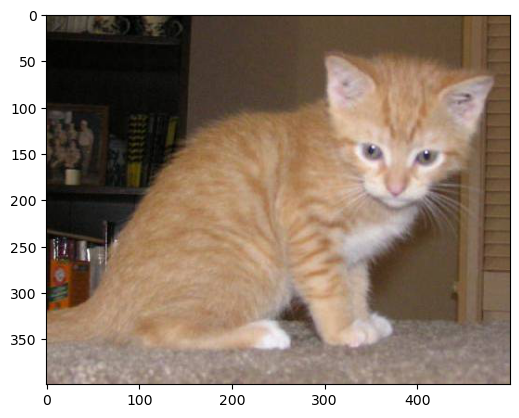

In [59]:
# testing on individual image
file_full_path="dog cat/test_set/cats/cat.4003.jpg"
Z = plt.imread("dog cat/test_set/cats/cat.4003.jpg")
plt.imshow(Z)
test_image=image.load_img(file_full_path,target_size=(224,224))
test_image=image.img_to_array(test_image)
test_image=test_image/255
test_image=np.expand_dims(test_image,axis=0)
result=model.predict(test_image)
print(file_full_path,"---->"," ",result,"-->", np.argmax(result) )

1/1 [==============================] - 0s 27ms/step
dog cat/test_set/dogs/dog.4001.jpg ---->   [[0.00252668 0.9974733 ]] --> 1


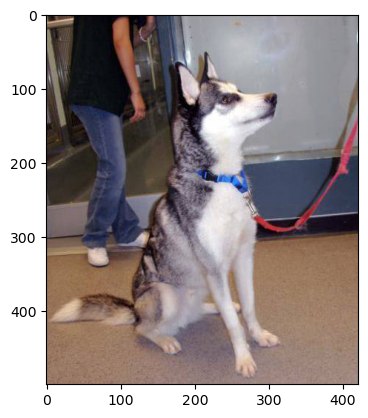

In [64]:
# testing on individual image
file_full_path="dog cat/test_set/dogs/dog.4001.jpg"
Z = plt.imread("dog cat/test_set/dogs/dog.4001.jpg")
plt.imshow(Z)
test_image=image.load_img(file_full_path,target_size=(224,224))
test_image=image.img_to_array(test_image)
test_image=test_image/255
test_image=np.expand_dims(test_image,axis=0)
result=model.predict(test_image)
print(file_full_path,"---->"," ",result,"-->", np.argmax(result) )